# Деревья решений


Автор: **[Булыгин Олег](https://olegtalks.ru/)**

## Проверка связи

**Поставьте в чат:**<br>
\+ — если меня видно и слышно<br>
**–** — если нет

**Если у вас нет звука:**

* убедитесь, что на вашем устройстве и в колонках включён звук

* обновите страницу вебинара или закройте её и переподключитесь

* откройте вебинар в другом браузере

* перезагрузите ваше устройство и подключитесь снова

## О спикере

**[Олег Булыгин](https://olegtalks.ru/)**

👨‍💻 **Опыт в образовании**
* В IT-образовании с 2017 года. Провёл более 1 500 лекций и вебинаров, обучил тысячи студентов, многие из которых сейчас работают в ведущих IT-компаниях
*  Создаю авторские курсы, консультирую крупные компании по вопросам data science, участвую в разработке образовательных программ для университетов и онлайн-школ

🎯 Стремлюсь сделать обучение качественным и честным для всех, кто хочет развиваться в IT-сфере

📱 Делюсь полезными материалами по Python:
- [Telegram](https://t.me/pythontalk_ru)
- [Дзен](https://dzen.ru/pythontalk)
</div>

## Правила участия

1. Продолжительность вебинара — 1 час 30 минут. Через 45 минут сделаем 5-минутный перерыв
2. Запустите Jupyter Notebook / Google Colab / IDE для выполнения практических заданий вебинара. Во время демонстрации работы можете повторять за спикером: это помогает лучше понять материал
3. Создайте копию этого блокнота и фиксируйте в нём вопросы и важную информацию во время занятия
4. Вы можете писать вопросы в чате во время вебинара или задавать их вслух в блоке «Ваши вопросы»
5. Запись вебинара будет доступна в личном кабинете

## Цели занятия

* Обеспечить понимание теоретических основ метода дерева решений и его роли в машинном обучении.

* Рассмотреть алгоритм построения дерева решений и основные параметры настройки модели.

* Демонстрировать применение дерева решений для классификационных задач на практических примерах.

* Изучить методы оценки качества модели дерева решений, включая кросс-валидацию и метрики классификации.

* Ознакомить с методами визуализации дерева решений и интерпретации результатов модели.



## План вебинара
1. Деревья решений
2. Определение важности признаков
3. Обобщение на задачу регрессии
4. Итоги: преимущества и недостатки decision tree

## Деревья решений


Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. Для начала разберём их на примере классификации.

Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил.




Классическим примером подобной задачи является врачебная диагностика различных заболеваний. Когда пациент приходит к врачу с жалобой на кашель, доктор проводит его осмотр, отвечая при этом на следующие вопросы:

1. Как давно кашель?
2. Есть ли температура?
3. Заложен ли нос?
4. Как прослушиваются легкие, бронхи?
5. Каков сердечный ритм пациента?
6. Возраст, наличие флюорограммы, др. факторы?

Исходя из ответов на эти вопросы доктор осуществляет постановку диагноза пациенту.

Обратите внимание, что врачу достаточно задать лишь небольшое количество вопросов, а не все возможные вопросы о вашем состоянии, а также ему не нужно перечитывать весь медицинский справочник. Ваш ответ на каждый из вопросов врача сужает количество возможных вердиктов, пока не останется всего один, и это происходит довольно быстро (5-6 вопросов).

Именно такая логика заложена в структуре решающего дерева.


Еще один наглядный пример - принятие решение о выдаче кредита:



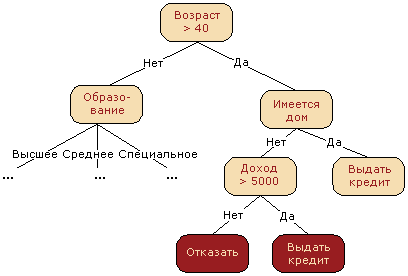

Решающее дерево представляет собой так называемый **граф**, то есть последовательность некоторых вершин, соединенных ребрами.


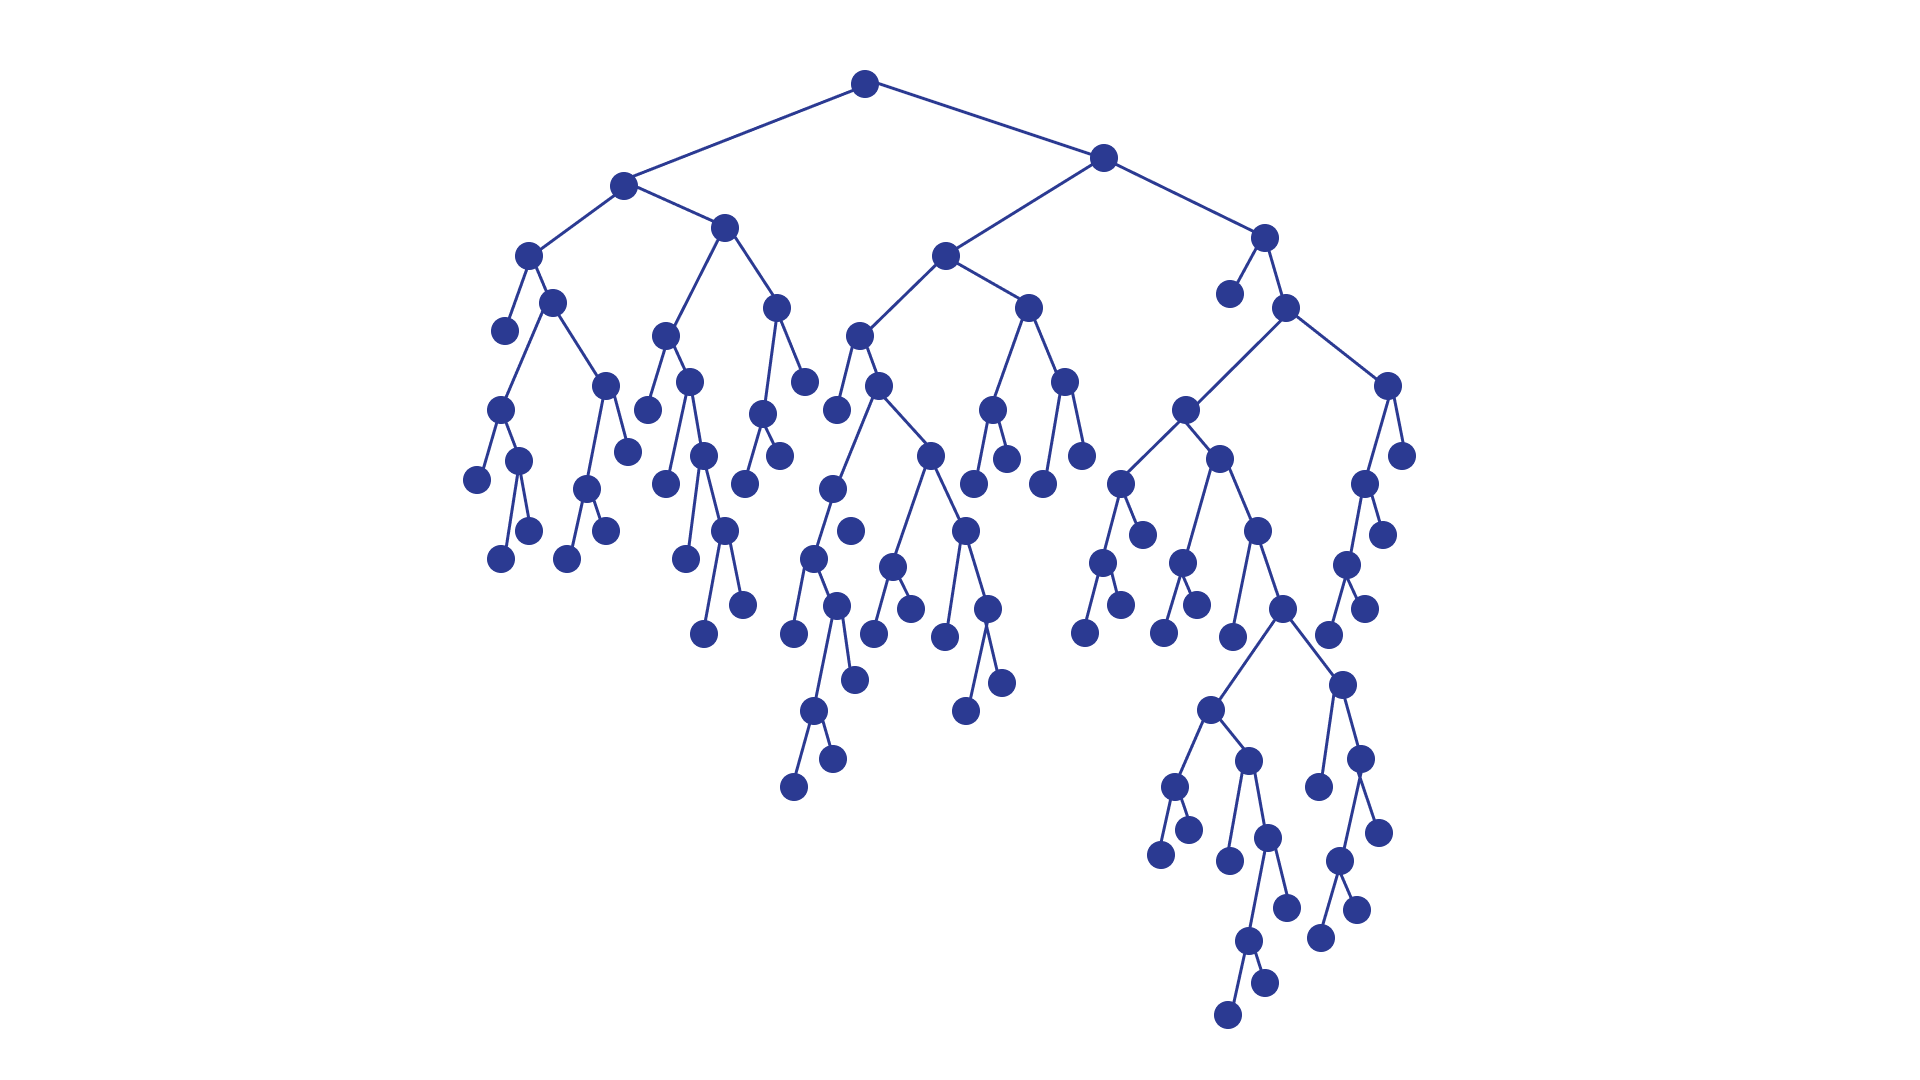



Cтруктура дерева решений — это *связный ациклический граф*. Что это значит?

Граф — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

Связный граф — это граф, в котором между любой парой существует направленная связь.

Ациклический граф — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

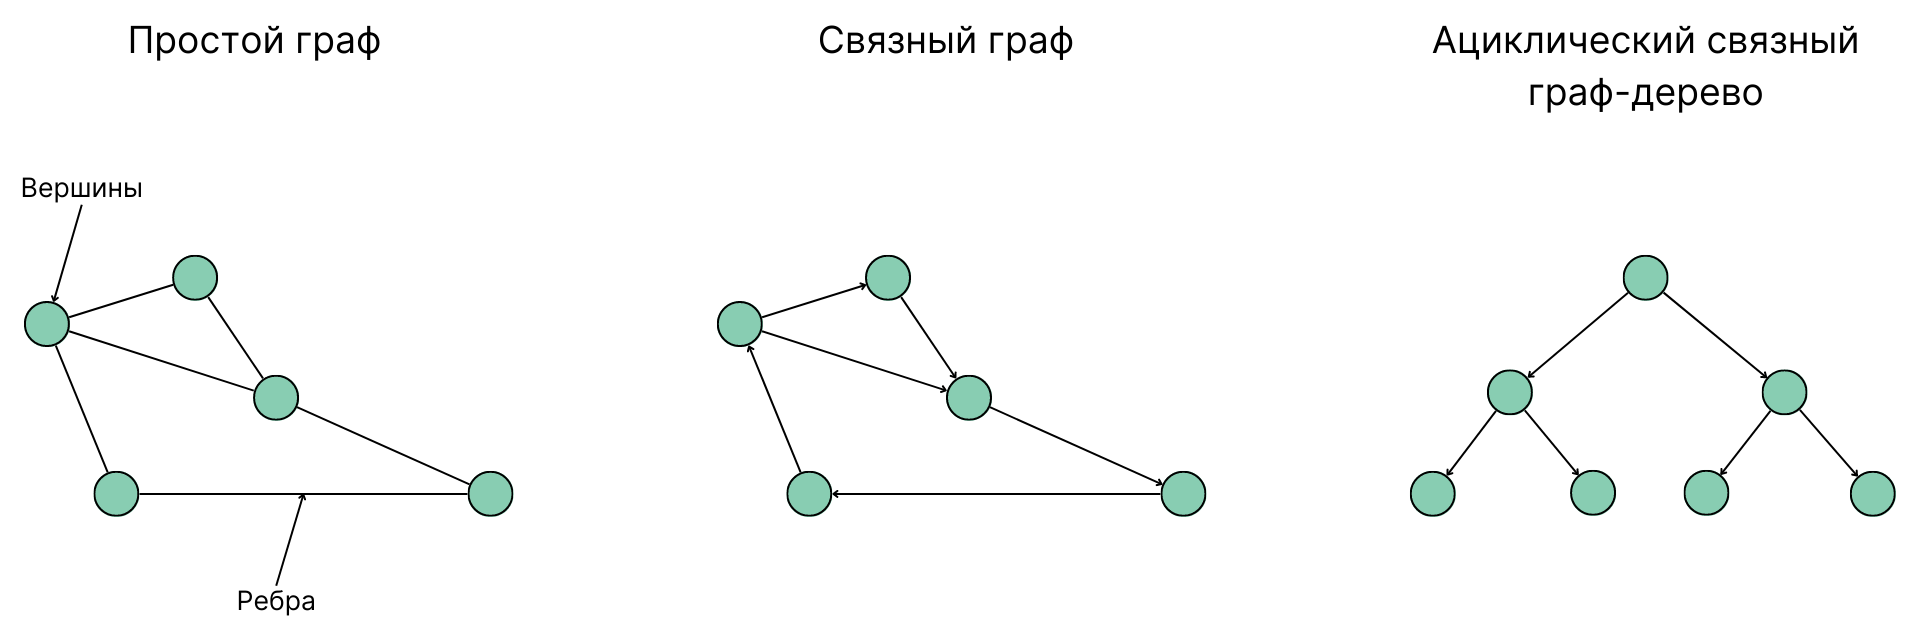

На вход дерева подается некоторый объект, представленный вектором своего признакового описания. В каждой внутренней вершине для исходного объекта вычисляется значение некоторого выражения, которое может принимать одно из двух значений - True или False. В зависимости от этого значения мы идем в левую или правую ветвь данного дерева, пока наконец не придем к некоторой листовой вершине. Каждая  листовая вершина содержит в себе некоторый ответ, который мы и принимаем в качестве результата классификации исходного объекта.

В дереве решений можно выделить три типа вершин:



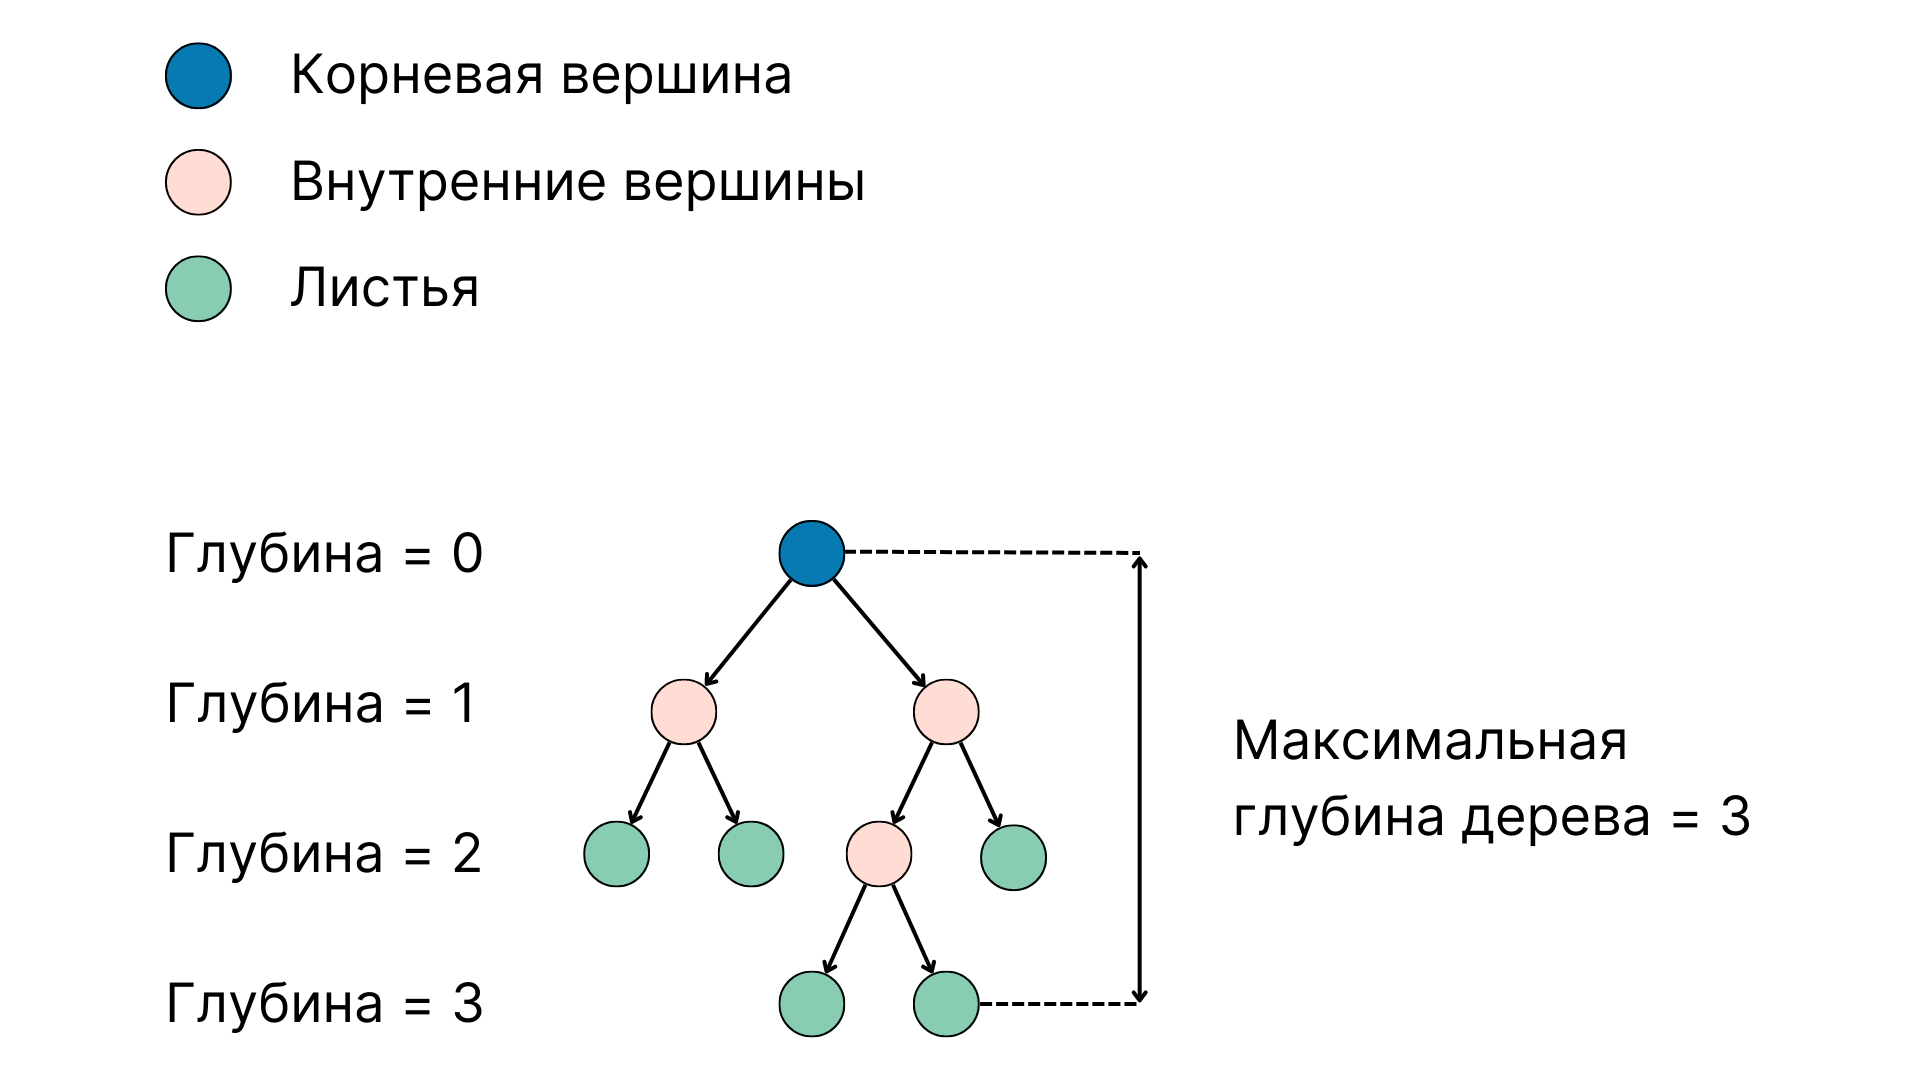

*Корневая вершина (root node)* — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту.  

*Внутренние вершины (intermediate nodes)* — это дополнительные уточняющие вопросы, которые дерево задаёт объекту.  

*Листья (leafs)* — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву.

Логический критерий, который находится в каждой вершине, называется *предикатом*, или *решающим правилом*.

Дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как метод наименьших квадратов, можно забыть. Необходимо полным перебором найти такую комбинацию признаков и пороговых значений , которая обеспечит наилучшее уменьшение неопределённости (будет лучше раздлять данные на части).   
Неопределенность измеряется в показатели энтропии (энтропия Шеннона, критерий Джинни). Например, критерий Джинни считает, сколько из попавших в одну и ту же ветвь согласно разделению по предикату β объектов действительно должны были оказаться в одной ветви.


Вернемся к медицинским данным и построим модель по двум признакам

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
data = load_breast_cancer()
print(data.DESCR)
df = pd.DataFrame(
        data=data.data,
        columns=data.feature_names)

df['class'] = data.target


df['class'] = df['class'].replace({0: 1, 1: 0})

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], random_state=42, stratify=df['class'])


Для начала возьмем 2 признака

In [ ]:
X_train_simple = X_train[['worst concave points', 'worst perimeter']]
X_test_simple = X_test[['worst concave points', 'worst perimeter']]

<Axes: xlabel='worst concave points', ylabel='worst perimeter'>

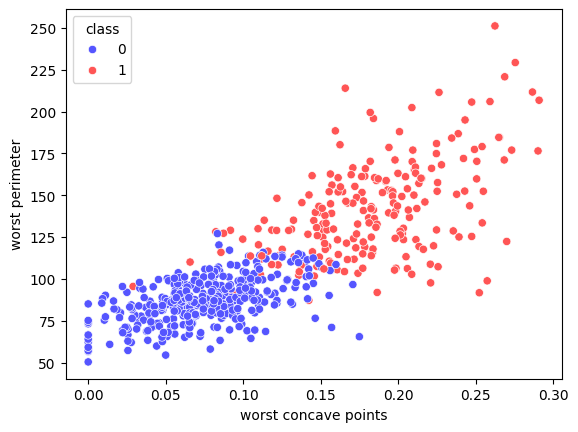

In [ ]:
sns.scatterplot(
    data=df,
    x='worst concave points',
    y='worst perimeter',
    hue='class',
    palette='seismic'
)

Модель дерева решений, его модификаций, а также функции для работы с деревьями находятся в модуле tree библиотеки sklearn. Импортируем его:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Основные параметры DecisionTreeClassifier

- **criterion** — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).   


Как уже было сказано, для построения дерева решений необходимо определить некоторый критерий информативности, который оценивает качество распределения целевой переменной среди объектов множества предикатов. То есть чем больше значение критерия информативности, тем более точно подобран предикат.

По умолчанию используется  критерий Джини:
$$I(β, X)=|\{(x_i, x_j): y_i=y_j, β(x_i)=β(x_j)\}|$$

Критерий Джини считает, сколько из попавших в одну и ту же ветвь согласно разделению по предикату объектов действительно должны были оказаться в одной ветви.

- **max_depth** — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).    
- **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.  
- **min_samples_leaf** — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.  
- **random_state** — число, отвечающее за генерацию псевдослучайных чисел.  

При построении модели Decision Tree (дерева решений) нет необходимости применять StandardScaler (или любую другую технику масштабирования признаков). Это связано с тем, что алгоритм дерева решений не зависит от масштаба признаков.

Дерево решений принимает решения на основе пороговых значений признаков, которые оно находит в процессе обучения. Масштабирование признаков не влияет на выбор этих пороговых значений, так как дерево решений сравнивает значения признаков напрямую, а не использует их в каких-либо метриках расстояния или функционалах, чувствительных к масштабу.

Таким образом, если вы используете Decision Tree, можно пропустить этап масштабирования признаков.

In [ ]:
dt_simple = DecisionTreeClassifier(random_state=42)

dt_simple.fit(X_train_simple, y_train)

DecisionTreeClassifier(random_state=42)

Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть метод [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) из модуля tree.

Основные параметры функции:

- **decision_tree** — объект обученного дерева решений,  
- **feature_names** — наименования факторов,  
- **class_names** — названия классов,  
- **filled** — добавлять ли расцветку вершин графа.  

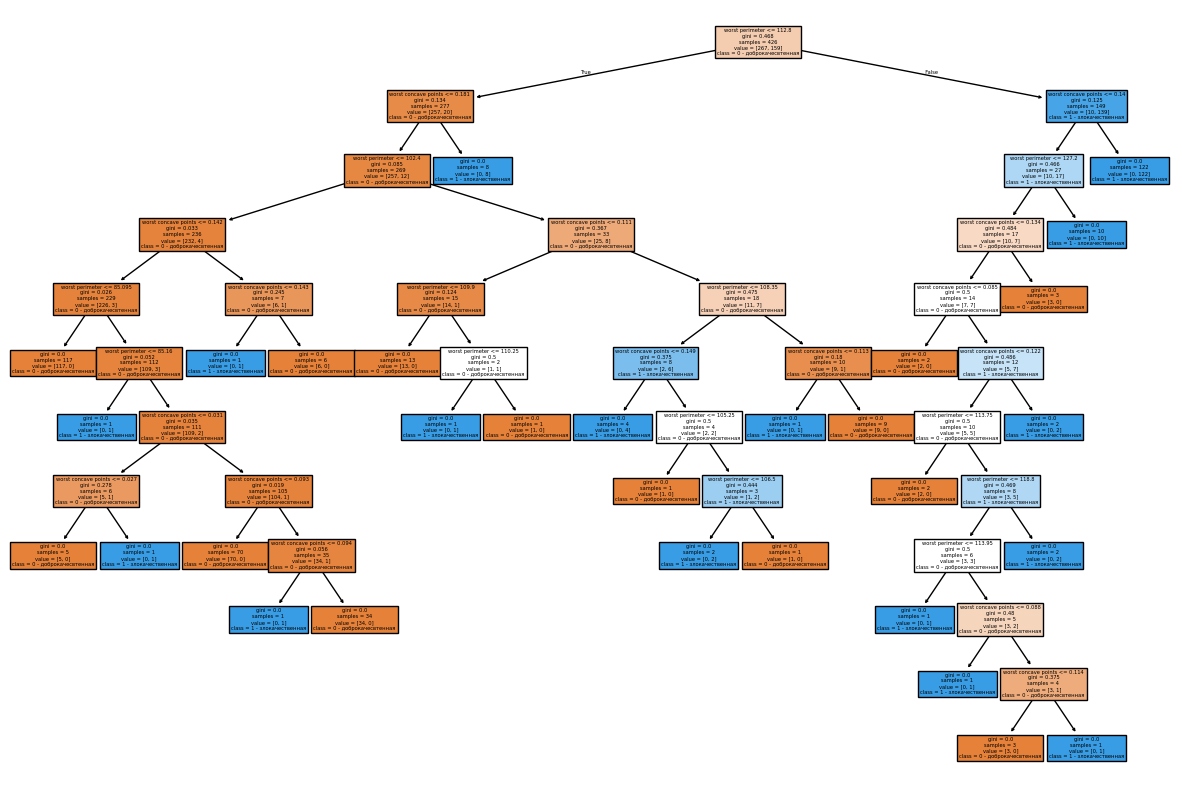

In [ ]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(
    dt_simple, # объект обученного дерева
    feature_names=X_train_simple.columns, # наименования факторов
    class_names=["0 - доброкачесвтенная", "1 - злокачественная"], # имена классов
    filled=True, # расцветка графа
)
plt.show()

В каждой из вершин записана следующая информация:

- **предикат**, по которому происходит разбиение;  
- **entropy** — значение энтропии в текущей выборке;    
- **samples** — количество объектов;    
- **values** — количество объектов каждого из классов;    
- **class** — преобладающий класс, на основе которого будет сделано предсказание.  

«Прогоняем» характеристики пациента через предикаты в вершинах графа. Если предикат равен True, то идём по левому ребру вглубь графа, а если False — по правому.

Описанные выше операции дерево производит автоматически с помощью метода `predict()` — для предсказания класса объекта.

Рассчитаем метрики качества и матрицу ошибок на кросс-валидации.

Оценка на трейне


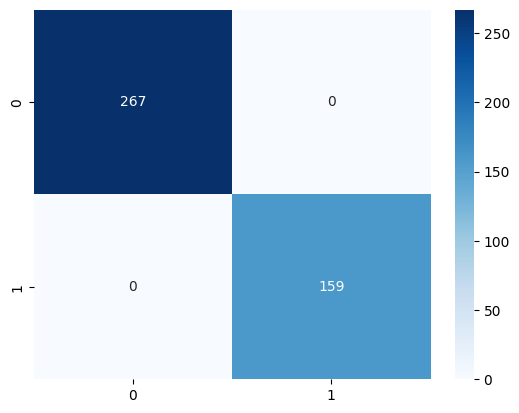

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Оценка на кросс-валидации


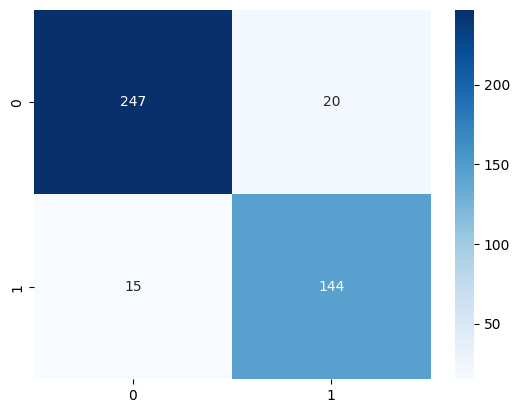

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       267
           1       0.88      0.91      0.89       159

    accuracy                           0.92       426
   macro avg       0.91      0.92      0.91       426
weighted avg       0.92      0.92      0.92       426



In [ ]:
y_pred_simple = dt_simple.predict(X_train_simple)
y_pred_cv_simple = cross_val_predict(dt_simple, X_train_simple, y_train, cv=5)


print('Оценка на трейне')
sns.heatmap(confusion_matrix(y_train, y_pred_simple), annot=True, fmt='d',  cmap='Blues')
plt.show()
report = classification_report(y_train, y_pred_simple)
print(report)

print('Оценка на кросс-валидации')
sns.heatmap(confusion_matrix(y_train, y_pred_cv_simple), annot=True, fmt='d',  cmap='Blues')
plt.show()
report_cv = classification_report(y_train, y_pred_cv_simple)
print(report_cv)



In [ ]:
dt_simple.get_depth()

11

Не кажется ли вам, что здесь что-то не так?

Типичный случай переобучения.
В принципе дерево решений можно построить до такой глубины, чтоб в каждом листе был ровно один объект. Но на практике это не делается (если строится только одно дерево) из-за того, что такое дерево будет переобученным – оно слишком настроится на обучающую выборку и будет плохо работать на прогноз на новых данных. Где-то внизу дерева, на большой глубине будут появляться разбиения по менее важным признакам. Если утрировать, может оказаться так, что из всех 4 клиентов, пришедших в банк за кредитом в зеленых штанах, никто не вернул кредит. Но мы не хотим, чтобы наша модель классификации порождала такие специфичные правила.

Почти всегда стоит использовать регуляризацию деревьев — ограничивать их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).


In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# создадим сетку параметров для decision_tree
param_grid = {
    'max_depth': range(2, 11),
    'min_samples_leaf':  range(1, 6),
    'class_weight': [None, 'balanced']
}


gs = GridSearchCV(dtc,
                param_grid=param_grid,
                cv=skf,
                scoring='recall',
                n_jobs=-1)


In [ ]:
gs.fit(X_train_simple, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_}')

Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 2, 'min_samples_leaf': 1}
Лучшее качество на кросс-валидации: 0.9120967741935484


Построим classification report на трейне

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       267
           1       0.94      0.92      0.93       159

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426



<Axes: >

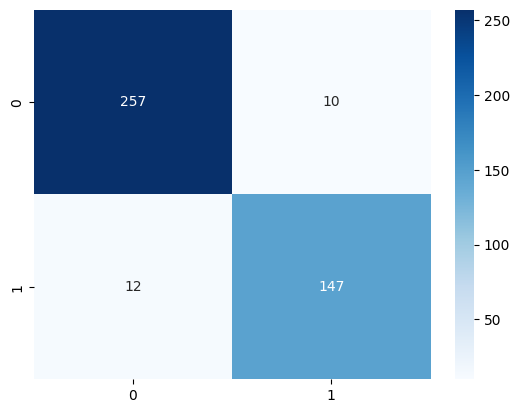

In [ ]:
y_pred_train = gs.predict(X_train_simple)
print(classification_report(y_train, y_pred_train))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d',  cmap='Blues')

А теперь оценка на кросс-валидации:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       267
           1       0.86      0.91      0.89       159

    accuracy                           0.91       426
   macro avg       0.90      0.91      0.91       426
weighted avg       0.91      0.91      0.91       426



<Axes: >

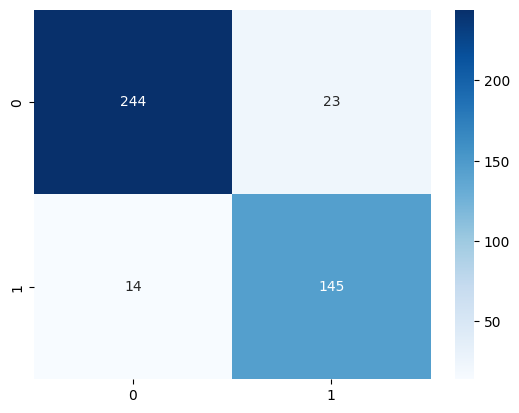

In [ ]:

y_pred_cv = cross_val_predict(gs.best_estimator_, X_train_simple, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred_cv)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred_cv), annot=True, fmt='d',  cmap='Blues')

Качество на валидации стало лучше. Теперь построим само дерево и визуализацию разделяющих правил

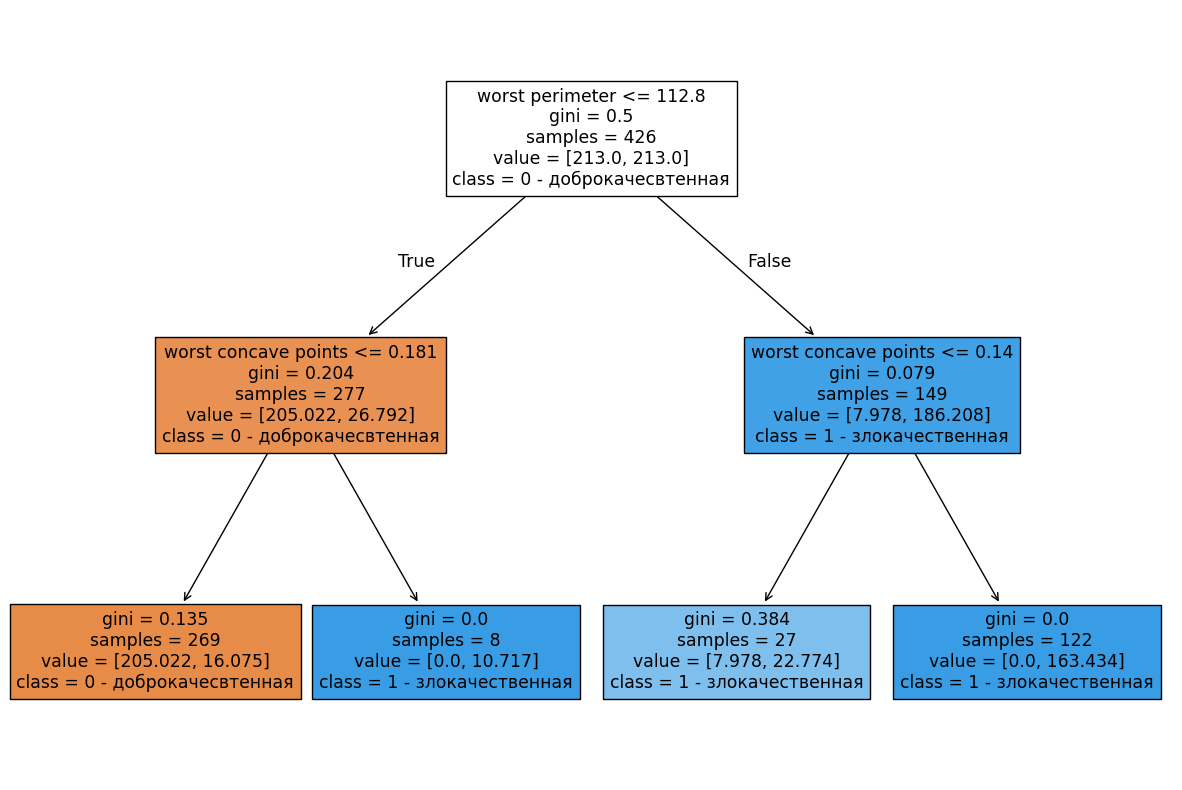

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(
    gs.best_estimator_, #объект обученного дерева
    feature_names=X_train_simple.columns, #наименования факторов
    class_names=["0 - доброкачесвтенная", "1 - злокачественная"], #имена классов
    filled=True, #расцветка графа
)
plt.show()

Давайте попробуем обучить дерево решений на всех признаках. Принцип остаётся тем же, меняется только матрица наблюдений X:



Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 2}
Лучшее качество на кросс-валидации: 0.925
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       267
           1       0.88      0.92      0.90       159

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.93      0.92      0.93       426



<Axes: >

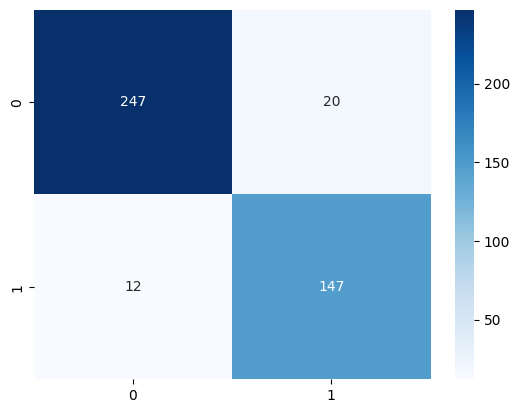

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

# создадим сетку параметров для decision_tree
param_grid = {
    'max_depth': range(2, 11),
    'min_samples_leaf':  range(1, 6),
    'class_weight': [None, 'balanced']
}



gs = GridSearchCV(dtc,
                    param_grid=param_grid,
                    cv=skf,
                    scoring='recall',
                    n_jobs=-1)


gs.fit(X_train, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')

# построим classification report на CV
y_pred_cv = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred_cv)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred_cv), annot=True, fmt='d',  cmap='Blues')

Метрика на кросс-валидации улучшилась по сравнению с обучением на двух признаках.



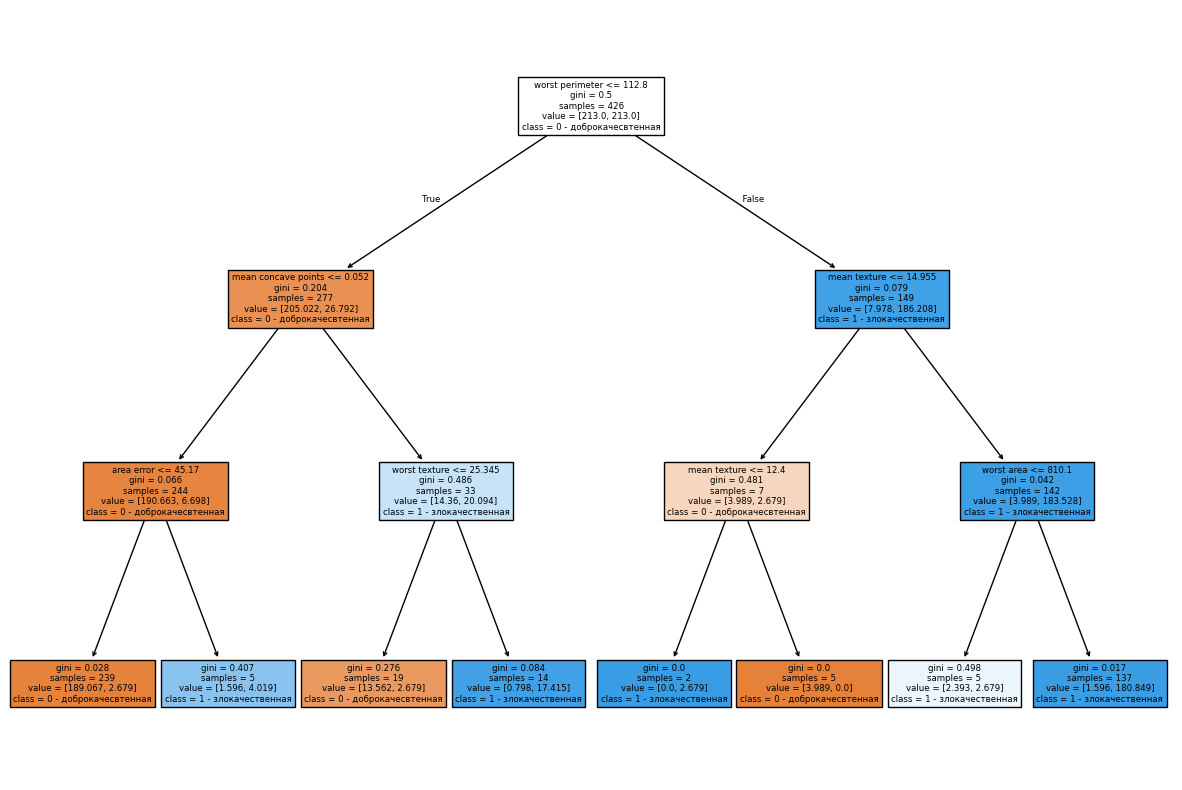

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(
    gs.best_estimator_, #объект обученного дерева
    feature_names=X_train.columns, #наименования факторов
    class_names=["0 - доброкачесвтенная", "1 - злокачественная"], #имена классов
    filled=True, #расцветка графа
)
plt.show()

## Определения важности признаков

Дерево решений позволяет определить важность признаков.

Важность признаков можно посмотреть, обратившись к атрибуту feature_importances_:

In [ ]:
gs.best_estimator_.feature_importances_

array([0.        , 0.03866896, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09136164, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02773696, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05548413, 0.7758237 , 0.01092459, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Значения, которые будут выведены в качестве элементов массива, и есть коэффициенты важности каждого из признаков. Для удобства можно построить столбчатую диаграмму:



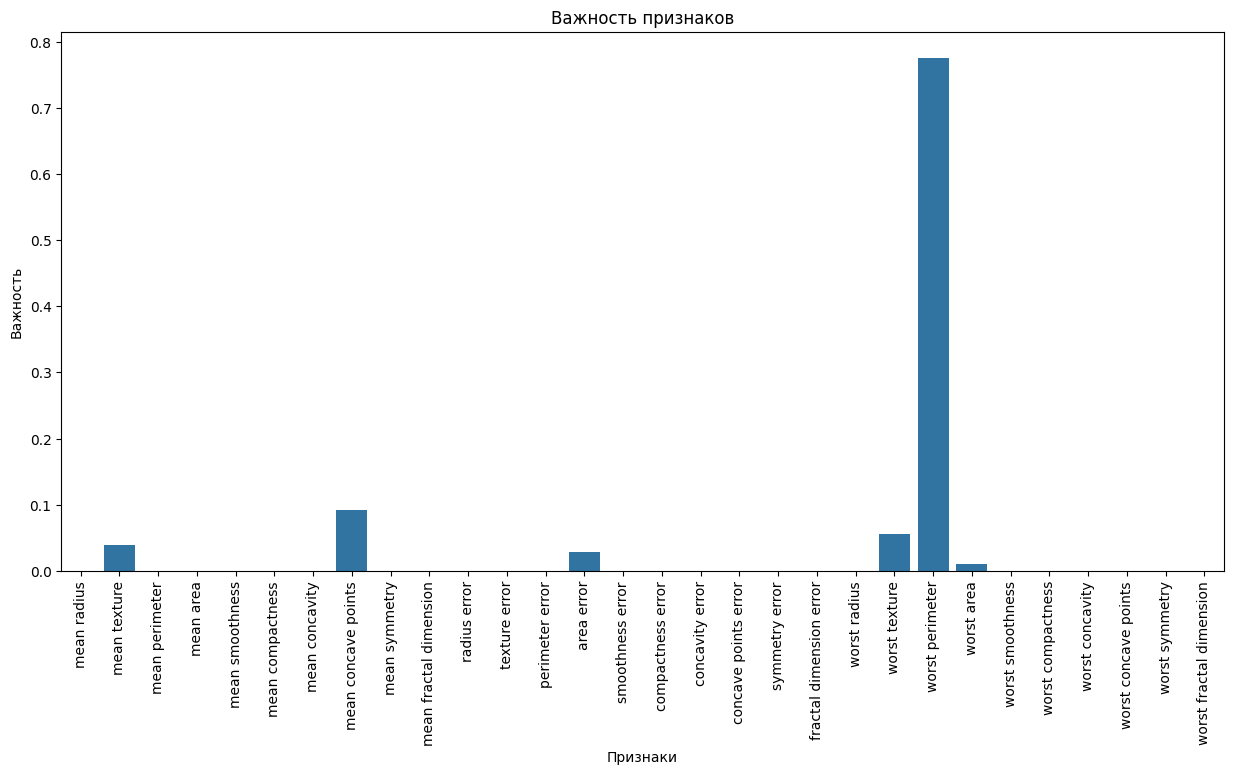

In [ ]:
feature = X_train.columns #признаки
feature_importances = gs.best_estimator_.feature_importances_ #важность признаков
plt.figure(figsize=(15, 7))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Отбор признаков по важности
selected_features = X_train.columns[feature_importances > 0]

# Создание новых наборов данных с отобранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected

,mean texture,mean concave points,area error,worst texture,worst perimeter,worst area
251,18.45,0.020690,26.99,22.46,83.12,508.9
373,17.35,0.089410,77.02,23.17,166.80,1946.0
211,18.94,0.013930,17.12,24.99,85.22,546.3
52,18.24,0.013490,17.47,21.33,83.67,527.2
315,16.85,0.006423,12.69,19.71,84.48,544.2
...,...,...,...,...,...,...
37,18.42,0.029230,14.16,22.81,84.46,545.9
415,21.17,0.021790,19.53,27.21,85.09,522.9
458,25.13,0.017620,21.19,31.88,91.06,628.5
476,20.53,0.030580,31.01,27.26,112.10,828.5


Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 5}
Лучшее качество на кросс-валидации: 0.943
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       267
           1       0.90      0.94      0.92       159

    accuracy                           0.94       426
   macro avg       0.93      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426



<Axes: >

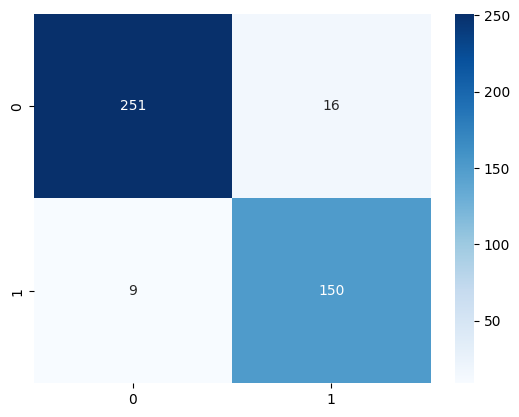

In [ ]:
gs.fit(X_train_selected, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')

# построим classification report на CV
y_pred_cv = cross_val_predict(gs.best_estimator_, X_train_selected, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred_cv)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred_cv), annot=True, fmt='d',  cmap='Blues')

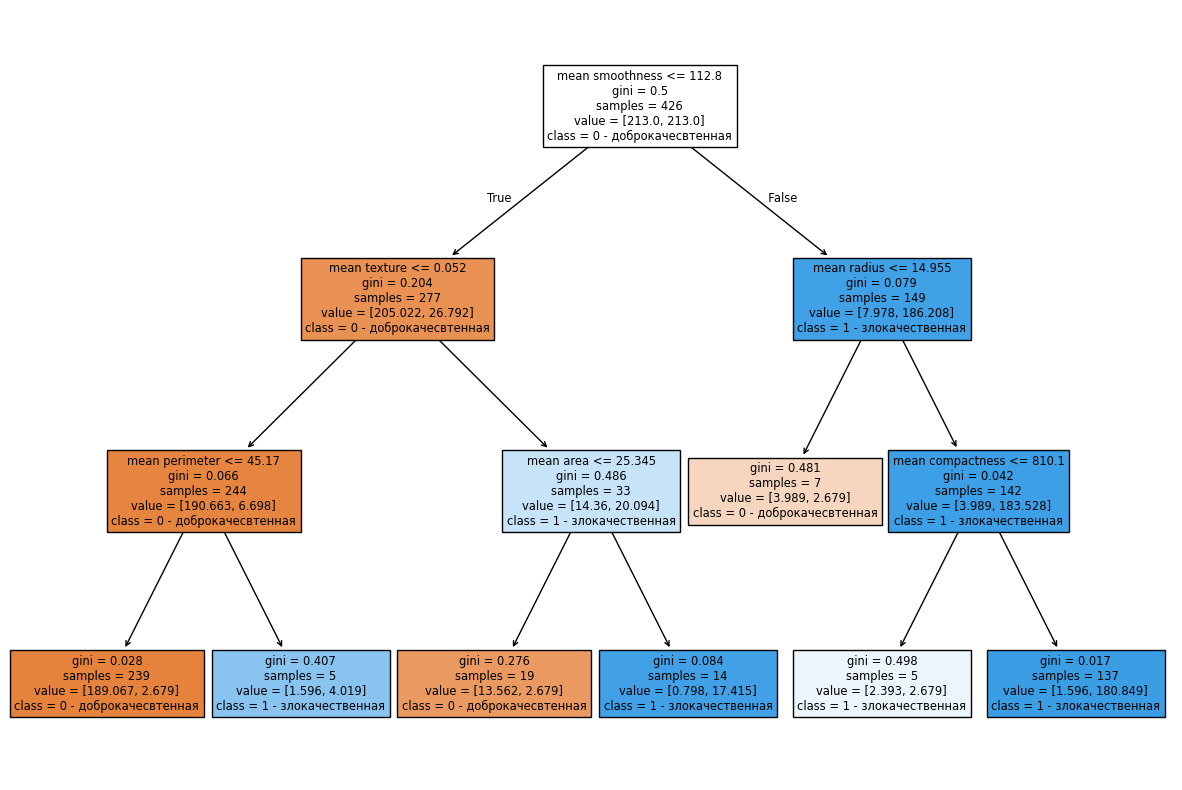

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(
    gs.best_estimator_, # объект обученного дерева
    feature_names=X_train.columns, # наименования факторов
    class_names=["0 - доброкачесвтенная", "1 - злокачественная"], # имена классов
    filled=True, # расцветка графа
)
plt.show()

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным.

Кроме того, значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, например, точность их измерения.

*Не стоит приравнивать значимость к корреляции. Корреляция — это коэффициент линейной зависимости, а значимость может отражать и нелинейные связи (в зависимости от сложности дерева).*

Ну и проверить лучший вариант на тесте:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        90
           1       0.94      0.87      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



<Axes: >

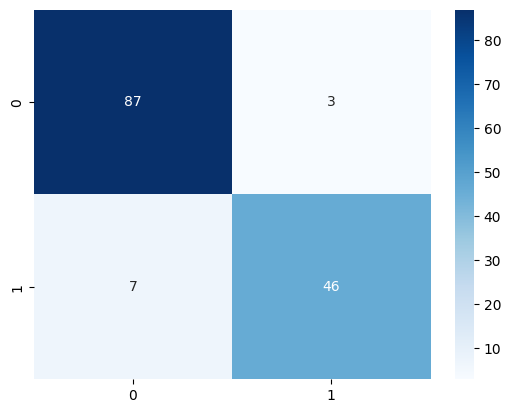

In [ ]:
y_test_pred = gs.predict(X_test_selected)

report = classification_report(y_test, y_test_pred)
print(report)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d',  cmap='Blues')

## Обобщение на задачу регрессии

Обобщение на задачу регрессии строится при помощи следующего трюка: вместо метки класса в листовую вершину поместим некоторое значение предсказания. В дальнейшем алгоритм работы решающего дерева очень похож на случай классификации: мы распределяем объекты по листовым вершинам, а также в процессе обучения считаем среднее значение меток для объектов, попавших в каждую из листовых вершин. Предсказание на этапе теста будет равно именно этому среднему значению.

В случае с регрессией и критерии ветвления  используются другие. Изученные ранее критерии не подходят, ведь теперь понятие класса объекта вообще не определено. В связи с этим определяются другие критерии ветвления, например критерий ветвления, основанный на минимизации дисперсии меток объектов, абсолютное отклонение от медианы и т.п.

Убедимся, что все будет работать:

In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='house_sales')
df = data.data.drop(['date', 'zipcode', 'lat', 'long', 'yr_renovated'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'],
                                                    random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=42079
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=42092

  warn(warning_msg)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': range(2, 11),
    'min_samples_leaf':  range(1, 6)
}

gs = GridSearchCV(dtr,
                  param_grid=param_grid,
                  scoring='r2',
                  n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 6)},
             scoring='r2')

In [ ]:
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 4}
Лучшее качество на кросс-валидации: 0.682


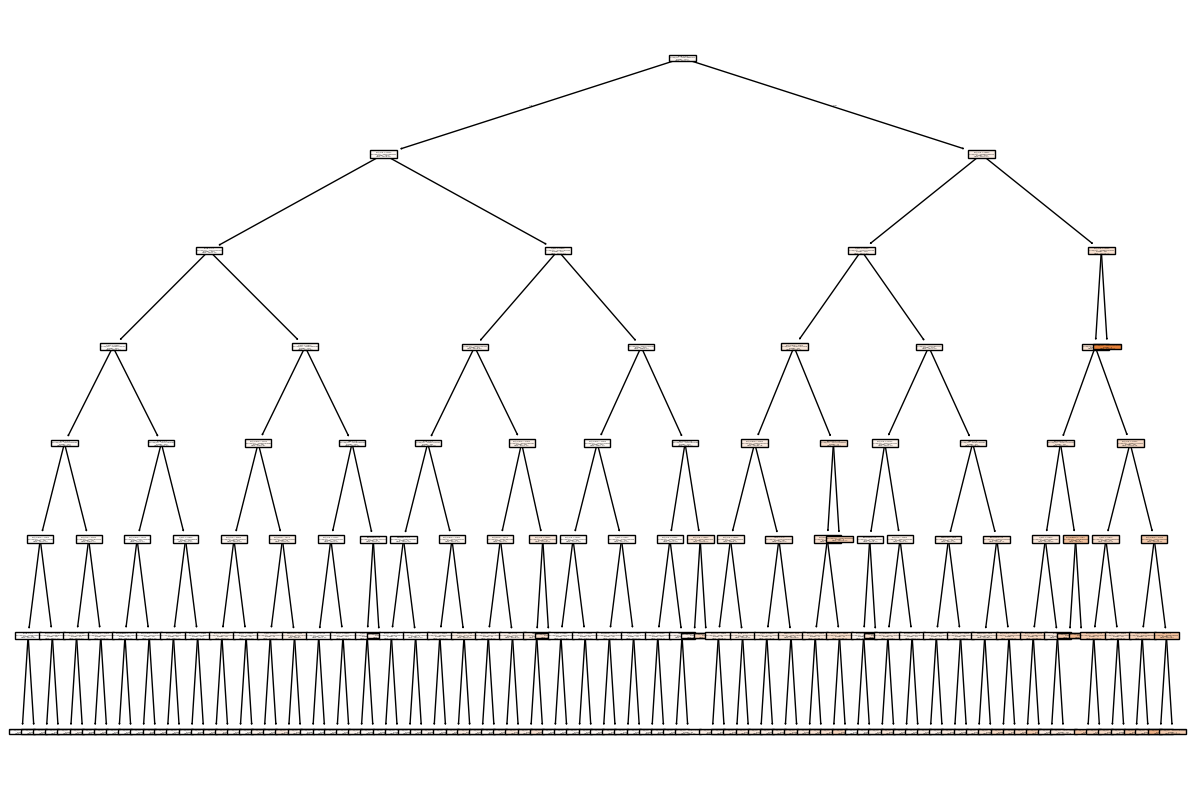

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(
    gs.best_estimator_, # объект обученного дерева
    feature_names=X_train.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

## Итоги: преимущества и недостатки decision tree
Преимущества:
- Дерево решений не требует нормализации/стандартизации данных.  
- За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.  
- Возможность получить важность признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.
- Они легко интерпретируемы. В бизнесе это часто становится ключевым. Более сложные алгоритмы напоминают «чёрный ящик» и не ясно, по какому именно принципу они принимают решения. Деревья решений могут легко визуализироваться: можно почти всегда ответить на вопрос почему на этом объекте получился данный прогноз.  
- Годятся и для классификации, и для регрессии — в этом случае в листьях дерева будут числа, а не значение класса.

Недостатки:
- Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях.
- Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие.
- Небольшое изменение в данных может заметно повлиять на структуру дерева.
- При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.
- Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси). Часто можно получить очень сложное решение для очень простых задач.